# PROBLEM STATEMENT

* Analyzing the factors influencing purchase frequency in the customer dataset. The goal is to identify patterns and relationships between purchase frequency and customer demographics (age, gender, income), spending behavior (spending score, last purchase amount), and preferences (preferred product category, membership years). These insights will help the business tailor strategies to increase purchase frequency among different customer segments."

# Data Loading

In [10]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_excel("/content/Copy of customer_segmentation_data(1) (1).xlsx")
print("Dataset loaded")

Dataset loaded


# ABOUT DATA SET
This dataset includes customer details such as Age, Gender, Income, Spending Score, Membership Years, Purchase Frequency, Preferred Category, and Last Purchase Amount. It provides a comprehensive view of customer behavior and demographics, making it ideal for segmentation analysis. By leveraging this data, businesses can identify customer patterns, optimize marketing strategies, personalize offers, and improve customer retention and overall business performance.

key futures of data set

1.Age: Classifying customers into age groups to understand generational differences in purchasing behavior.
2.Gender: Identifying if gender influences purchasing patterns or preferences for specific products.
3.Income: Segmenting customers based on income levels to tailor product offerings according to affordability.
4.Spending Score: Categorizing customers based on how much they spend relative to others, providing insights into high-value customers.
5.Membership Years: Analyzing how long customers have been with the business to determine loyalty and retention.
6.Purchase Frequency: Grouping customers by how often they make purchases, which can help identify frequent buyers versus occasional shoppers.
7.Preferred Category: Understanding customer preferences for specific product categories, allowing for targeted marketing strategies.
8.Last Purchase Amount: Analyzing recent purchasing behavior to segment based on recency and value of recent purchases.

# Data Inspection

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   Income                1000 non-null   int64  
 4   Spending_score        1000 non-null   int64  
 5   Membership_years      1000 non-null   int64  
 6   Purchase_frequency    1000 non-null   int64  
 7   Preferred_category    1000 non-null   object 
 8   Last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB



The dataset consists of 1000 entries and 9 columns. It includes a mix of data types: 6 integer columns (ID, Age, Income, Spending_score, Membership_years,Purchase_frequency), 2 categorical (object) columns (Gender, Preferred_category), and 1 floating-point column (Last_purchase_amount). There are no missing values across any of the columns, and the dataset is well-structured for analysis.

In [14]:
df.shape

(1000, 9)

In [15]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Spending_score', 'Membership_years',
       'Purchase_frequency', 'Preferred_category', 'Last_purchase_amount'],
      dtype='object')

In [16]:

df.dtypes

,0
ID,int64
Age,int64
Gender,object
Income,int64
Spending_score,int64
Membership_years,int64
Purchase_frequency,int64
Preferred_category,object
Last_purchase_amount,float64


In [17]:

df.head()

,ID,Age,Gender,Income,Spending_score,Membership_years,Purchase_frequency,Preferred_category,Last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [18]:
df.tail()

,ID,Age,Gender,Income,Spending_score,Membership_years,Purchase_frequency,Preferred_category,Last_purchase_amount
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16
999,1000,36,Female,90420,7,2,31,Groceries,669.26


In [19]:
df.sample()

,ID,Age,Gender,Income,Spending_score,Membership_years,Purchase_frequency,Preferred_category,Last_purchase_amount
474,475,36,Other,112674,12,7,35,Groceries,590.32


In [20]:
num_col = df.select_dtypes(include=[np.number])


In [21]:
cat_col = df.select_dtypes(include=['object'])
cat_col

,Gender,Preferred_category
0,Female,Groceries
1,Female,Sports
2,Female,Clothing
3,Other,Home & Garden
4,Female,Electronics
...,...,...
995,Male,Clothing
996,Other,Groceries
997,Male,Sports
998,Female,Electronics


In [22]:
print("Total number of unique values: ", df.nunique().sum())
df.nunique().sort_values(ascending=False)

Total number of unique values:  3210


,0
ID,1000
Income,996
Last_purchase_amount,994
Spending_score,100
Age,52
Purchase_frequency,50
Membership_years,10
Preferred_category,5
Gender,3


The dataset contains a total of 3,210 unique values across all columns, with significant variability in fields like Income (996 unique values) and Last_purchase_amount (994 unique values). Columns like Spending_score (100 unique values), Preferred_category (5 unique values), and Gender (3 unique values) suggest categorical or ordinal data, while ID serves as a unique identifier. The dataset combines both continuous and categorical variables, offering opportunities for diverse analyses.

In [23]:
df.select_dtypes(include=['int','float']).nunique().sum()
df.select_dtypes(include=['int','float']).nunique().sort_values(ascending=False)

,0
ID,1000
Income,996
Last_purchase_amount,994
Spending_score,100
Age,52
Purchase_frequency,50
Membership_years,10


In [24]:
df.select_dtypes(include='object').nunique().sum()
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

,0
Preferred_category,5
Gender,3


In [25]:
df.describe() # Calculates summary statistics

,ID,Age,Income,Spending_score,Membership_years,Purchase_frequency,Last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [26]:
df.describe(include='object').T # Calculates summary statistics

,count,unique,top,freq
Gender,1000,3,Male,357
Preferred_category,1000,5,Electronics,215


# Data Cleaning

In [27]:
df.duplicated().sum() # Count duplicate values

0

In [28]:
df.T.duplicated().sum() # Count duplicate columns

0

In [29]:
df.isna().sum().sort_values(ascending=False) # Count missing values per column

,0
ID,0
Age,0
Gender,0
Income,0
Spending_score,0
Membership_years,0
Purchase_frequency,0
Preferred_category,0
Last_purchase_amount,0


In [30]:
df.notnull().sum().sort_values(ascending=False)

,0
ID,1000
Age,1000
Gender,1000
Income,1000
Spending_score,1000
Membership_years,1000
Purchase_frequency,1000
Preferred_category,1000
Last_purchase_amount,1000


In [31]:
print('% of Missing values: ')
missing_values = (df.isna().sum()/len(df)) * 100
missing_values.sort_values(ascending=False) # % of missing values per column

% of Missing values: 


,0
ID,0.0
Age,0.0
Gender,0.0
Income,0.0
Spending_score,0.0
Membership_years,0.0
Purchase_frequency,0.0
Preferred_category,0.0
Last_purchase_amount,0.0


# Removing Duplicates

In [32]:
df.duplicated().sum()

0

In [33]:
df.T.duplicated().sum()

0

# Univariate Analysis

## Summary Statistics

In [34]:
df.describe()

,ID,Age,Income,Spending_score,Membership_years,Purchase_frequency,Last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [35]:
df.describe(include='object')

,Gender,Preferred_category
count,1000,1000
unique,3,5
top,Male,Electronics
freq,357,215


# Distribution plot

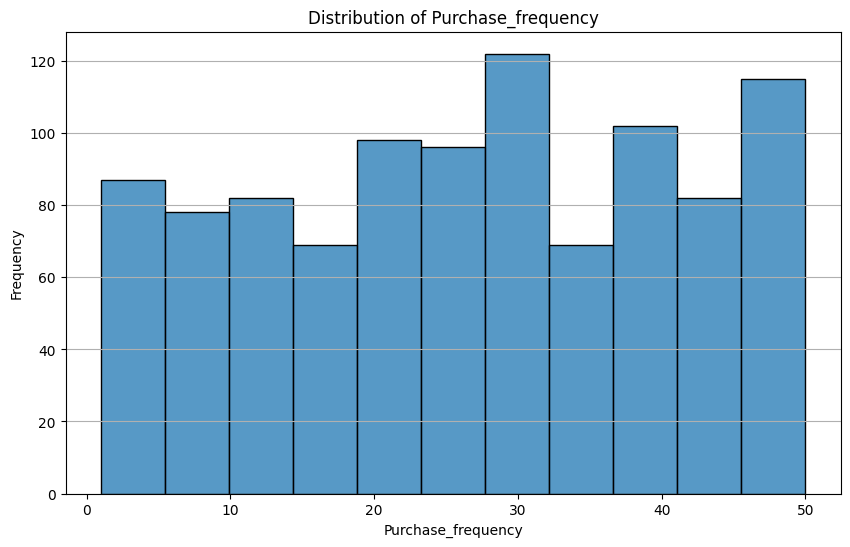

In [36]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.histplot(df['Purchase_frequency'])
plt.title("Distribution of Purchase_frequency")
plt.xlabel("Purchase_frequency")
plt.ylabel("Frequency")
plt.grid(True,axis='y')
plt.show()

Based on the histogram,

The distribution of Purchase_frequency shows a fairly uniform spread across the range of values, with slightly higher frequencies around the 30 and 50 . This suggests that while purchases are distributed evenly, there may be clusters of customers with higher purchase frequency at specific intervals. The data does not exhibit strong skewness, indicating a balanced representation of purchase behaviors across the dataset.

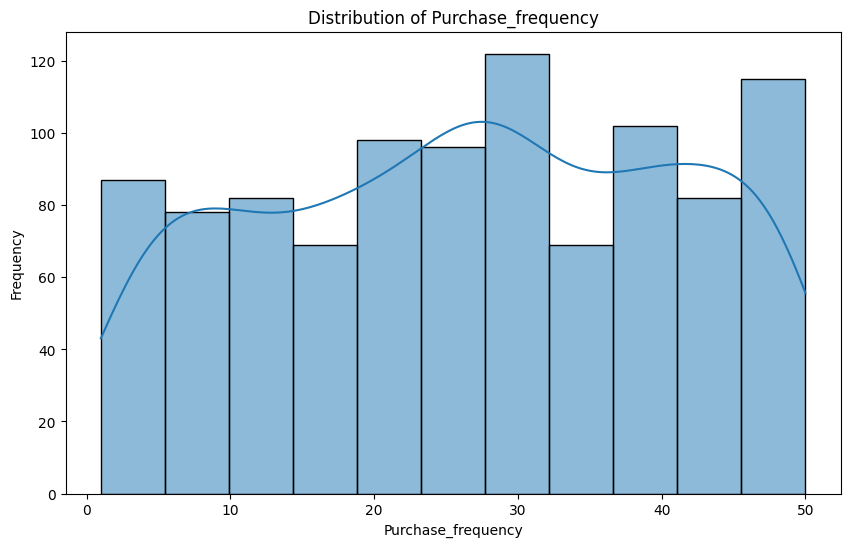

In [37]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.histplot(df['Purchase_frequency'],kde=True)
plt.title("Distribution of Purchase_frequency")
plt.xlabel("Purchase_frequency")
plt.ylabel("Frequency")
plt.show()

BASED ON THE KDE
The distribution of Purchase_frequency exhibits a relatively uniform spread across the range of values, with a noticeable peak around 30, indicating that this frequency is more common among customers. The inclusion of the KDE curve highlights a smooth upward trend from lower frequencies, reaching a peak at 30, and tapering off towards higher values. This suggests that while purchase frequency is diverse, mid-range frequencies are slightly more prevalent.

# Bivariate Analysis

In [38]:
num_col.corr()

,ID,Age,Income,Spending_score,Membership_years,Purchase_frequency,Last_purchase_amount
ID,1.000000,0.003226,0.017901,-0.025673,-0.009753,-0.013006,0.027475
Age,0.003226,1.000000,-0.000688,0.017707,-0.003431,-0.030137,0.061599
Income,0.017901,-0.000688,1.000000,0.000020,-0.035783,0.000533,-0.054006
Spending_score,-0.025673,0.017707,0.000020,1.000000,0.026726,0.006708,-0.014475
Membership_years,-0.009753,-0.003431,-0.035783,0.026726,1.000000,0.069532,-0.014135
Purchase_frequency,-0.013006,-0.030137,0.000533,0.006708,0.069532,1.000000,0.024400
Last_purchase_amount,0.027475,0.061599,-0.054006,-0.014475,-0.014135,0.024400,1.000000


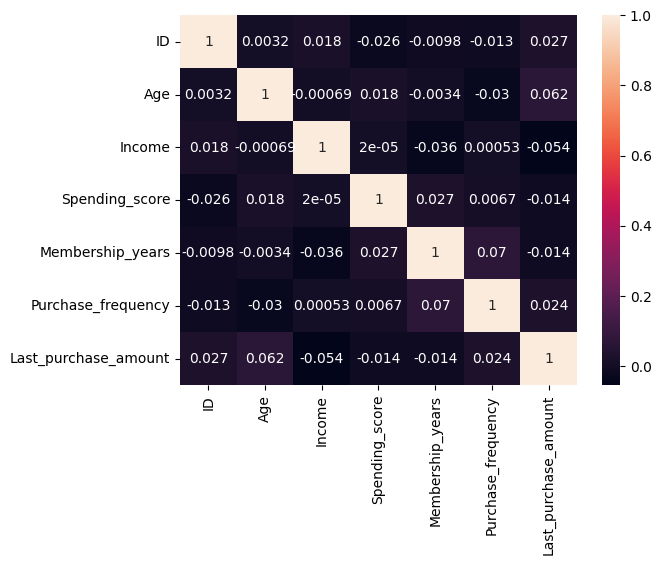

In [39]:
ct=sns.heatmap(num_col.corr(),annot=True)


The heatmap displays the pairwise correlation coefficients between variables in the dataset. Most correlations are weak, with values close to 0, indicating minimal linear relationships. Notable observations include a slight positive correlation between Purchase_frequency and Membership_years (0.07) and between Age and Last_purchase_amount (0.062). Variables like Income and Spending_score show almost no correlation with others, suggesting independence. Overall, the dataset exhibits weak or negligible relationships among its features.

In [40]:
# Here there is Weak correlation between the features

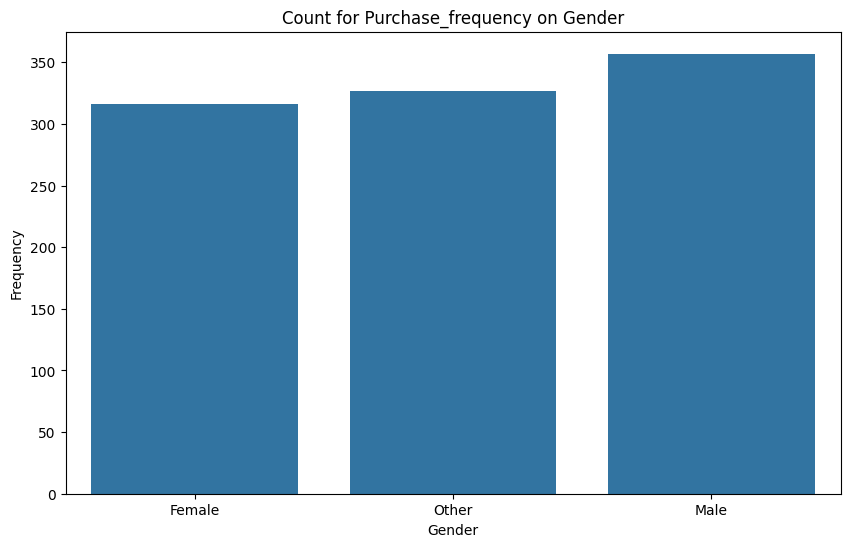

In [41]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.countplot(df,x='Gender')
plt.title("Count for Purchase_frequency on Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()


The count of Purchase_frequency across genders shows a fairly balanced distribution. Male customers have a slightly higher frequency compared to Female and Other genders, with Female having the lowest count. This indicates that gender does not significantly skew purchase frequency, although there is a slight dominance of Male customers in this dataset.

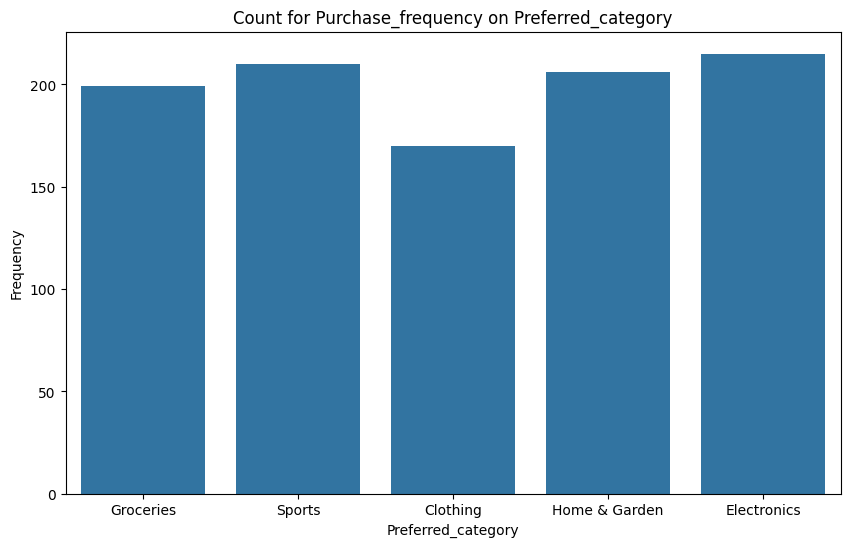

In [42]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.countplot(df,x='Preferred_category')
plt.title("Count for Purchase_frequency on Preferred_category")
plt.xlabel("Preferred_category")
plt.ylabel("Frequency")
plt.show()


The count of Purchase_frequency across Preferred_category indicates that customers show relatively high preference for Electronics and Sports, followed closely by Home & Garden and Groceries. Clothing has the lowest frequency among the categories. This suggests that customer preferences are slightly skewed toward Electronics and Sports, with Clothing being a less frequently chosen category.

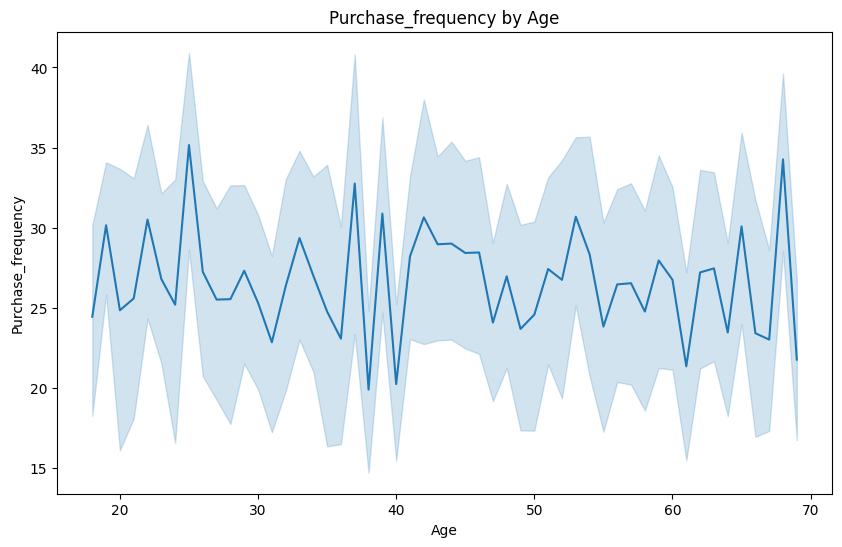

In [43]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.lineplot(df,x='Age',y="Purchase_frequency")
plt.title("Purchase_frequency by Age")
plt.xlabel("Age")
plt.ylabel("Purchase_frequency")
plt.show()

The relationship between Age and Purchase_frequency shows a fluctuating trend, with no clear linear pattern. While some age groups exhibit peaks in purchase frequency, others show dips, indicating variability across different ages. The shaded region reflects significant variability, suggesting that factors other than age might influence purchase frequency. Overall, purchase frequency appears relatively consistent across most age ranges with some sporadic spikes.

Axis Labels:

*The x-axis represents the age of individuals, ranging from 20 to 70 years.
*The y-axis represents the purchase frequency, ranging from 15 to 40.


Observations:

*There is no clear linear relationship between age and purchase frequency.
*Purchase frequency fluctuates with high variability, particularly in certain age ranges (e.g., between 30–40 and 50–60).

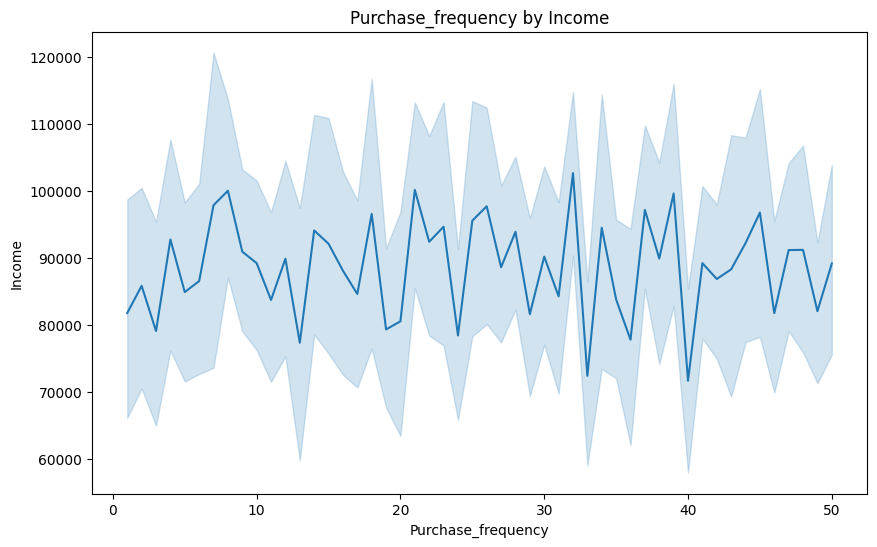

In [44]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.lineplot(df,y='Income',x="Purchase_frequency")
plt.title("Purchase_frequency by Income")
plt.xlabel("Purchase_frequency")
plt.ylabel("Income")
plt.show()

The plot shows a fluctuating relationship between purchase frequency and income, with no clear trend observed. Income ranges broadly between 60,000 and 120,000, exhibiting peaks and dips at various purchase frequencies. This suggests a non-linear relationship with significant variability in income levels.

Line Plot:
*The blue line represents the central trend between purchase frequency and income. It indicates how income varies with changes in purchase frequency.

 Axes:

*The x-axis represents purchase frequency, ranging from 0 to 50.
*The y-axis represents income, ranging from 60,000 to 120,000.

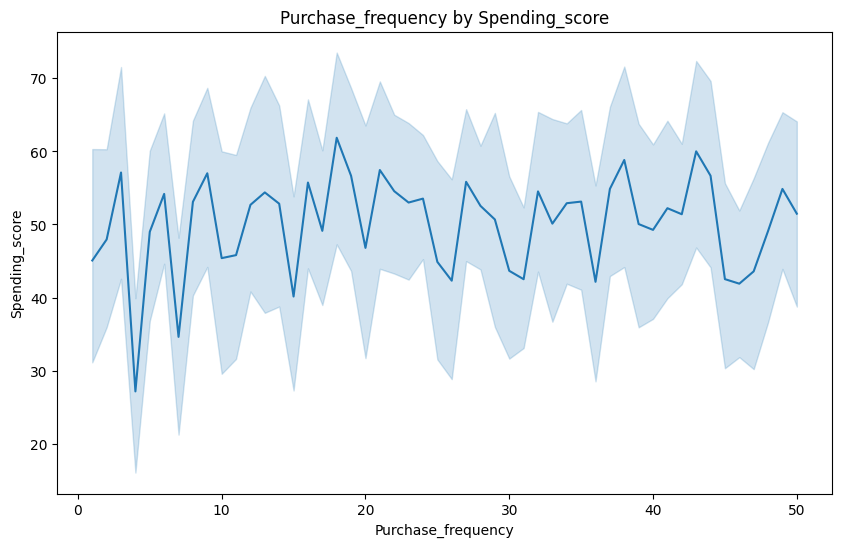

In [45]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.lineplot(df,y='Spending_score',x="Purchase_frequency")
plt.title("Purchase_frequency by Spending_score")
plt.xlabel("Purchase_frequency")
plt.ylabel("Spending_score")
plt.show()

The plot illustrates the relationship between purchase frequency and spending score, showing considerable variability with no distinct trend. Spending scores generally range between 20 and 70, with fluctuations observed across different purchase frequencies. This indicates a non-linear relationship, where spending behavior varies significantly across the dataset.

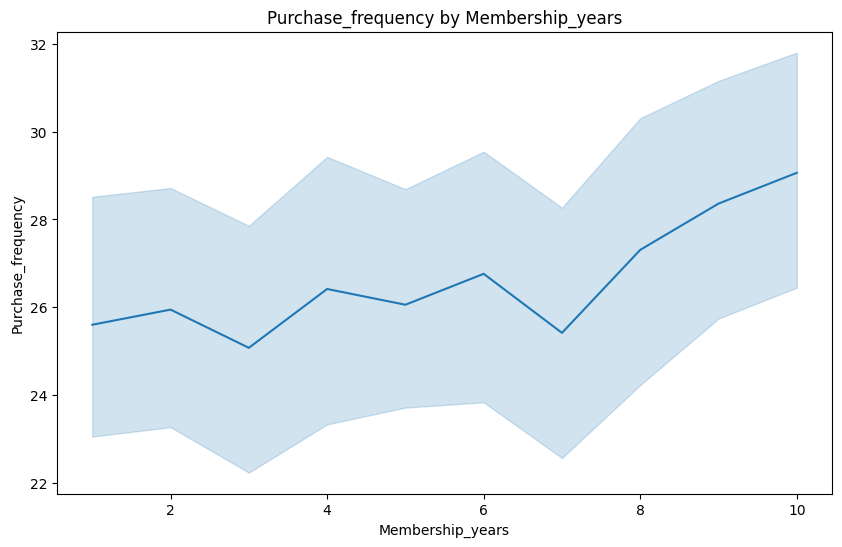

In [46]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.lineplot(df,y='Purchase_frequency',x="Membership_years")
plt.title("Purchase_frequency by Membership_years")
plt.xlabel("Membership_years")
plt.ylabel("Purchase_frequency")
plt.show()

The plot shows a positive trend between membership years and purchase frequency, indicating that longer membership years are associated with increased purchase frequency. While there is slight variability in the earlier years, the trend becomes more consistent with a gradual rise after six years. The shaded area suggests minor fluctuations but generally highlights a strong upward relationship.

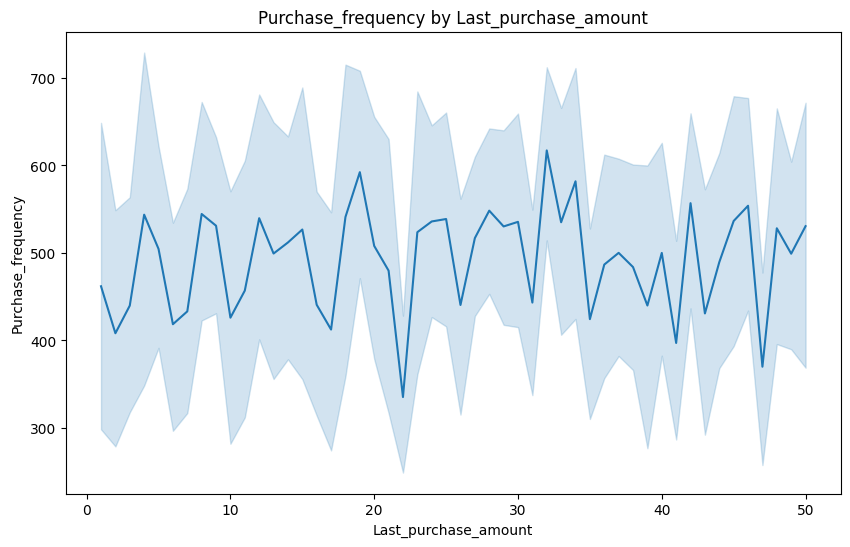

In [47]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.lineplot(df,y='Last_purchase_amount',x="Purchase_frequency")
plt.title("Purchase_frequency by Last_purchase_amount")
plt.xlabel("Last_purchase_amount")
plt.ylabel("Purchase_frequency")
plt.show()

This line chart visualizes the relationship between `Purchase_Frequency` and `Last_Purchase_Amount`, with a shaded region representing variability or confidence intervals. The central line depicts the trend, showing fluctuations in `Purchase_Frequency` as the `Last_Purchase_Amount` increases. The shaded area indicates the range of variability around the trend, which widens and narrows at different points, reflecting inconsistent variation in the data. While there is no clear linear relationship, the chart highlights peaks and troughs in `Purchase_Frequency`, suggesting that it does not consistently rise or fall with changes in `Last_Purchase_Amount`. The variability in both axes suggests that other factors might influence the relationship between these two variables.

# Multivariate Analysis

In [48]:
sns.pairplot(df,hue='Gender')

Output hidden; open in https://colab.research.google.com to view.

The pair plot provides a comprehensive view of the relationships and distributions among variables such as `Age`, `Income`, `Spending_Score`, `Membership_Years`, `Purchase_Frequency`, and `Last_Purchase_Amount`, categorized by gender (Female, Male, and Other). Most variables exhibit distinct distributions, with `Income` and `Spending_Score` showing relatively symmetrical patterns, while `Membership_Years` appears more uniform. Scatterplots between variables reveal no strong linear or non-linear correlations, although subtle clustering can be observed in specific pairs, such as `Age` vs. `Spending_Score` or `Membership_Years` vs. `Income`. Gender distinctions are present but not pronounced, with slight differences in distributions like `Spending_Score` and `Last_Purchase_Amount`. Overall, the plot highlights the diversity and range of the data, suggesting potential for deeper exploration of clusters or subgroup patterns.

# Identifying Outliers

In [49]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Spending_score', 'Membership_years',
       'Purchase_frequency', 'Preferred_category', 'Last_purchase_amount'],
      dtype='object')

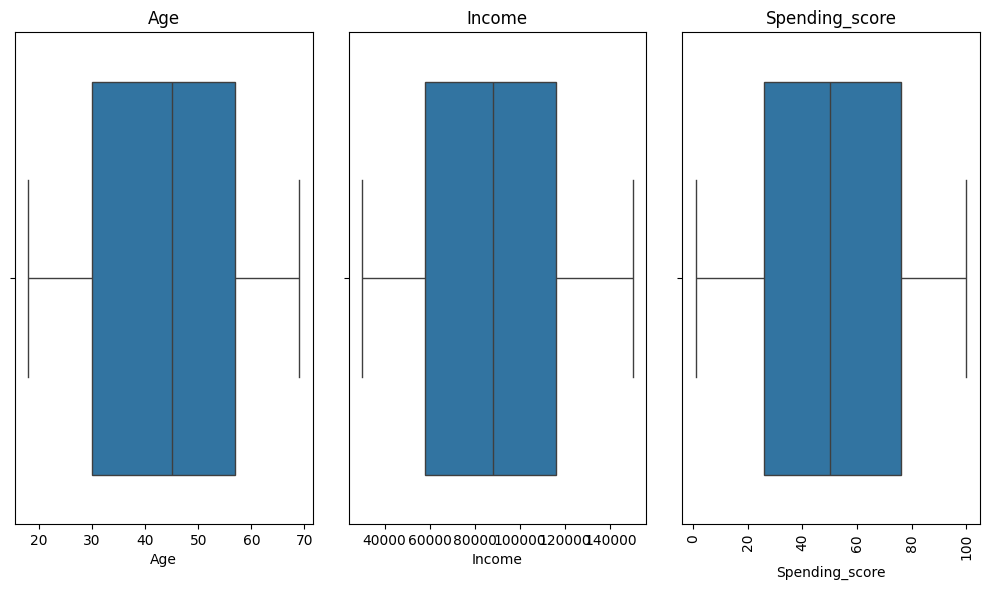

In [50]:
fig, axes = plt.subplots(1,3, figsize=(10,6))

# Plot each boxplot on a separate subplot
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Age')

sns.boxplot(x=df['Income'], ax=axes[1])
axes[1].set_title('Income')
plt.xticks(rotation=90)

sns.boxplot(x=df['Spending_score'], ax=axes[2])
axes[2].set_title('Spending_score')
plt.tight_layout()
plt.show()

This figure presents boxplots for the variables `Age`, `Income`, and `Spending_Score`, offering insights into their distributions. The `Age` distribution is relatively symmetrical, with a median around 40-50 years and an interquartile range (IQR) spanning from approximately 30 to 60, with no apparent outliers. Similarly, `Income` exhibits a broader range, with an IQR of about 60,000 to 100,000 and a median around 80,000, showing a symmetrical and evenly distributed spread without outliers. The `Spending_Score` also follows a similar trend, with an IQR from roughly 40 to 80 and a median of 60, indicating a balanced distribution. Overall, the data for all three variables appears well-distributed and lacks extreme values or significant deviations, suggesting consistent and clean datasets for these features.

* Here There is  no outliers in Age, Income, Spending_score

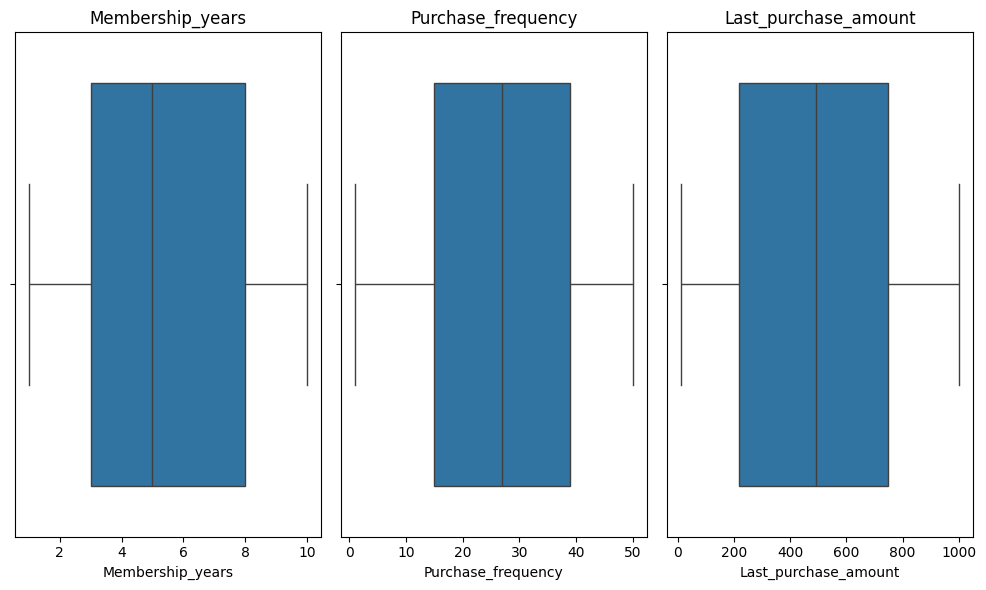

In [51]:
fig, axes = plt.subplots(1,3, figsize=(10,6))
sns.boxplot(x=df['Membership_years'], ax=axes[0])
axes[0].set_title('Membership_years')

sns.boxplot(x=df['Purchase_frequency'], ax=axes[1])
axes[1].set_title('Purchase_frequency')

sns.boxplot(x=df['Last_purchase_amount'], ax=axes[2])
axes[2].set_title('Last_purchase_amount')
plt.tight_layout()
plt.show()

This figure displays boxplots for the variables `Membership_Years`, `Purchase_Frequency`, and `Last_Purchase_Amount`, illustrating their distributions and variability. The `Membership_Years` variable has a median near 6 years, with an interquartile range (IQR) extending from about 4 to 8 years, and no visible outliers, indicating a fairly balanced distribution. The `Purchase_Frequency` variable shows a slightly broader range, with a median around 25 and an IQR spanning from approximately 15 to 35, again with no outliers. Similarly, the `Last_Purchase_Amount` variable has a median close to 600, with an IQR from about 400 to 800, demonstrating a well-contained and symmetrical distribution. Overall, all three variables exhibit clean, evenly distributed data with no extreme values, making them suitable for further analysis.

## Identifying Outliers With Quartile

In [52]:
Q1 = df['Purchase_frequency'].quantile(0.25)
Q3 = df['Purchase_frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Purchase_frequency'] < lower_bound) | (df['Purchase_frequency'] > upper_bound)]
display(outliers)

,ID,Age,Gender,Income,Spending_score,Membership_years,Purchase_frequency,Preferred_category,Last_purchase_amount


* With Quartile we have not found any outliers

#Machine Learning model

In [53]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

#from scipy.stats import zscore

import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np


from sklearn import metrics

In [54]:
csd=pd.DataFrame(df)

In [55]:
csd

,ID,Age,Gender,Income,Spending_score,Membership_years,Purchase_frequency,Preferred_category,Last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [56]:
#Feature (X) and Target(y)
X = df.drop('Purchase_frequency', axis=1)
y = df['Purchase_frequency']


In [57]:
# Convert categorical columns to numbers
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object'):
    X[col] = LabelEncoder().fit_transform(X[col])

In [58]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [59]:
len(X_train),len(X_val),len(X_test)

(600, 200, 200)

### MACHINE LEARNING ###
**k-MEANS CLUSTERING**

In [68]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load Dataset
#df = pd.read_csv('your_data.csv')  # Replace with your file

# Select Features for Clustering
X = df[['Purchase_frequency', 'Age', 'Income']]  # Replace with relevant columns

# Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train K-Means Model with Optimal Number of Clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace '3' with your optimal k
kmeans.fit(X_scaled)

# Add Cluster Labels to DataFrame
df['Cluster'] = kmeans.labels_
print("Cluster Labels Added to Dataset:")
print(df.head())

# Evaluation Metrics
# Inertia: Sum of squared distances of samples to their closest cluster center
print(f"Inertia (Within-Cluster Sum of Squares): {kmeans.inertia_}")

# Silhouette Score: Measures how well samples are clustered
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.3f}")


Cluster Labels Added to Dataset:
   ID  Age  Gender  Income  Spending_score  Membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   Purchase_frequency Preferred_category  Last_purchase_amount  Cluster  
0                  24          Groceries                113.53        1  
1                  42             Sports                 41.93        1  
2                  28           Clothing                424.36        2  
3                   5      Home & Garden                991.93        0  
4                  25        Electronics                347.08        2  
Inertia (Within-Cluster Sum of Squares): 1759.8258972360984
Silhouette Score: 0.251


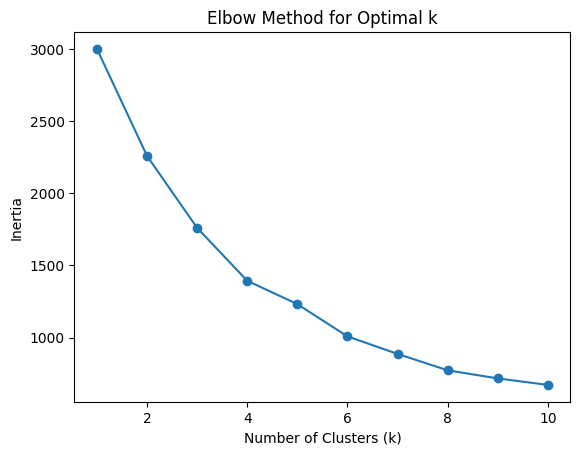

In [69]:
import matplotlib.pyplot as plt
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [70]:
from sklearn.metrics import silhouette_score
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    print(f"Silhouette Score for k={k}: {score:.3f}")


Silhouette Score for k=2: 0.239
Silhouette Score for k=3: 0.251
Silhouette Score for k=4: 0.273
Silhouette Score for k=5: 0.260


In [71]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_
print(df.head())


   ID  Age  Gender  Income  Spending_score  Membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   Purchase_frequency Preferred_category  Last_purchase_amount  Cluster  
0                  24          Groceries                113.53        1  
1                  42             Sports                 41.93        1  
2                  28           Clothing                424.36        2  
3                   5      Home & Garden                991.93        0  
4                  25        Electronics                347.08        2  


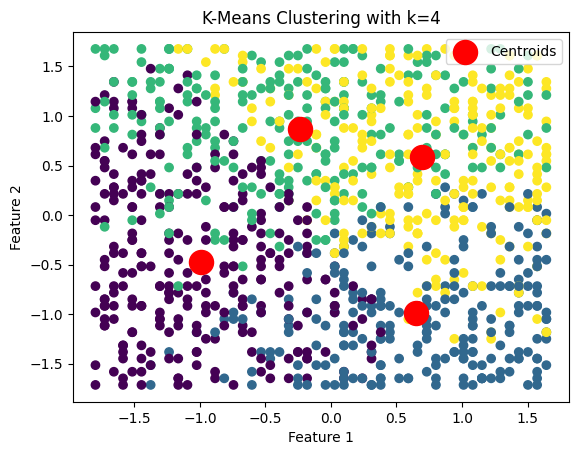

In [72]:
import matplotlib.pyplot as plt
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with k=4')
plt.legend()
plt.show()



In [73]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

# Prepare Data: Include categorical and numerical columns
X = df[['Age', 'Income', 'Spending_score', 'Preferred_category']]
X_encoded = X.copy()
X_encoded['Preferred_category'] = X['Preferred_category'].astype('category').cat.codes  # Encode categories numerically

# K-Prototypes Model
kproto = KPrototypes(n_clusters=4, random_state=42)
clusters = kproto.fit_predict(X_encoded, categorical=[3])

# Add cluster labels
df['Cluster'] = clusters
print(df.head())


   ID  Age  Gender  Income  Spending_score  Membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   Purchase_frequency Preferred_category  Last_purchase_amount  Cluster  
0                  24          Groceries                113.53        3  
1                  42             Sports                 41.93        2  
2                  28           Clothing                424.36        1  
3                   5      Home & Garden                991.93        0  
4                  25        Electronics                347.08        1  


In [74]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode the 'Preferred_category' column
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(df[['Preferred_category']]).toarray()

# Merge One-Hot Encoded Data with Original Features
category_columns = encoder.get_feature_names_out(['Preferred_category'])
df_encoded = pd.DataFrame(category_encoded, columns=category_columns)
df_combined = pd.concat([df, df_encoded], axis=1)

# Drop original categorical column
df_combined = df_combined.drop('Preferred_category', axis=1)

# Scale Data and Apply K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_combined.select_dtypes(include=[np.number]))
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

df_combined['Cluster'] = kmeans.labels_
print(df_combined.head())


   ID  Age  Gender  Income  Spending_score  Membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   Purchase_frequency  Last_purchase_amount  Cluster  \
0                  24                113.53        2   
1                  42                 41.93        3   
2                  28                424.36        2   
3                   5                991.93        1   
4                  25                347.08        2   

   Preferred_category_Clothing  Preferred_category_Electronics  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          1.0                             0.0   
3             

In [75]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Income', 'Spending_score', 'Last_purchase_amount']
X_scaled = scaler.fit_transform(df[numerical_features])

X = df[['Age', 'Income', 'Spending_score', 'Last_purchase_amount', 'Preferred_category']]
X = X.to_numpy()

numerical_columns = [0, 1, 2, 3]
categorical_columns = [4]

kproto = KPrototypes(n_clusters=5, random_state=42)
clusters = kproto.fit_predict(X, categorical=categorical_columns)

df['Cluster'] = clusters
print(df)

print("Cluster Centers:", kproto.cluster_centroids_)


       ID  Age  Gender  Income  Spending_score  Membership_years  \
0       1   38  Female   99342              90                 3   
1       2   21  Female   78852              60                 2   
2       3   60  Female  126573              30                 2   
3       4   40   Other   47099              74                 9   
4       5   65  Female  140621              21                 3   
..    ...  ...     ...     ...             ...               ...   
995   996   57    Male  112170              57                 6   
996   997   23   Other   65337              76                10   
997   998   23    Male  113097              40                 5   
998   999   22  Female  113695              63                 7   
999  1000   36  Female   90420               7                 2   

     Purchase_frequency Preferred_category  Last_purchase_amount  Cluster  
0                    24          Groceries                113.53        1  
1                    42        